<a href="https://colab.research.google.com/github/Siddharthxyz/trader-sentiment-analysis/blob/main/trader_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBERIES


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8,5)
sns.set_style("whitegrid")


Load datasets


In [ ]:
trades = pd.read_csv("historical_data.csv.crdownload")
sentiment = pd.read_csv("fear_greed_index.csv")


/tmp/ipython-input-4039177113.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv("historical_data.csv.crdownload")


In [ ]:
print("Trades data shape:", trades.shape)
print("Sentiment data shape:", sentiment.shape)

Trades data shape: (194126, 16)
Sentiment data shape: (2644, 4)


In [ ]:
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Convert date/time columns

In [ ]:
# Convert trade time to datetime
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['date'] = trades['Timestamp IST'].dt.date

# Convert sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
sentiment['date'] = sentiment['date'].dt.date

In [ ]:
merged = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='inner'
)

print("Merged shape:", merged.shape)

Merged shape: (34324, 18)


In [ ]:
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [ ]:
merged[['date', 'classification', 'Closed PnL']].head()

,date,classification,Closed PnL
0,2024-02-12,Greed,0.0
1,2024-02-12,Greed,0.0
2,2024-02-12,Greed,0.0
3,2024-02-12,Greed,0.0
4,2024-02-12,Greed,0.0


In [ ]:
merged.groupby('classification')['Closed PnL'].mean()

,Closed PnL
classification,
Extreme Fear,4.679446
Extreme Greed,206.477543
Fear,123.107281
Greed,66.493757
Neutral,27.609742


In [ ]:
print(merged.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification'],
      dtype='object')


Average PnL by sentiment

In [ ]:
merged.groupby('classification')['Closed PnL'].mean()


,Closed PnL
classification,
Extreme Fear,4.679446
Extreme Greed,206.477543
Fear,123.107281
Greed,66.493757
Neutral,27.609742


Win rate by sentiment

In [ ]:
merged['win'] = merged['Closed PnL'] > 0
merged.groupby('classification')['win'].mean()


,win
classification,
Extreme Fear,0.310534
Extreme Greed,0.555060
Fear,0.389680
Greed,0.439138
Neutral,0.504438


Trade activity (number of trades)

In [ ]:
merged.groupby('classification')['Closed PnL'].count()


,Closed PnL
classification,
Extreme Fear,2193
Extreme Greed,5603
Fear,13062
Greed,10762
Neutral,2704


Risk analysis (loss magnitude)

In [ ]:
merged['absPnL'] = merged['Closed PnL'].abs()
merged[merged['Closed PnL'] < 0].groupby('classification')['absPnL'].mean()


,absPnL
classification,
Extreme Fear,27.340371
Extreme Greed,463.177085
Fear,169.792742
Greed,328.131977
Neutral,31.238223


Trade size behavior

In [ ]:
merged.groupby('classification')['Size USD'].mean()


,Size USD
classification,
Extreme Fear,3822.942503
Extreme Greed,3249.645849
Fear,5602.598241
Greed,4951.530856
Neutral,4361.694101


### REQUIRED VISUALIZATIONS (RUN ALL)

Average PnL

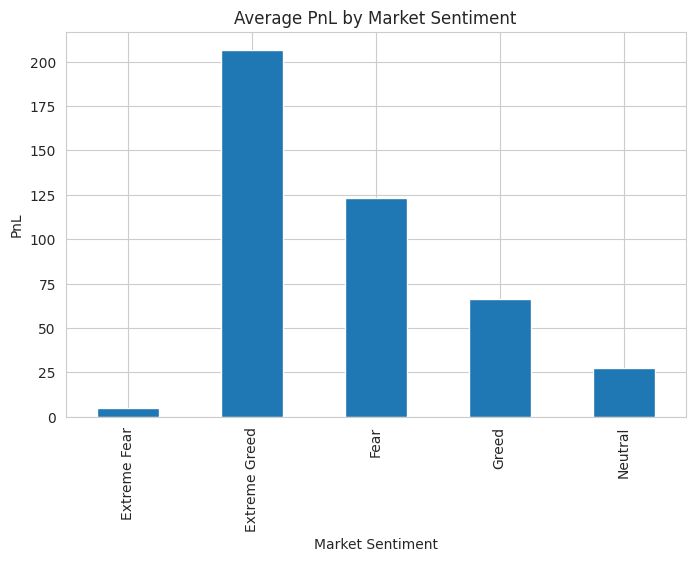

In [ ]:
merged.groupby('classification')['Closed PnL'].mean().plot(kind='bar')
plt.title("Average PnL by Market Sentiment")
plt.ylabel("PnL")
plt.xlabel("Market Sentiment")
plt.show()


PnL Distribution

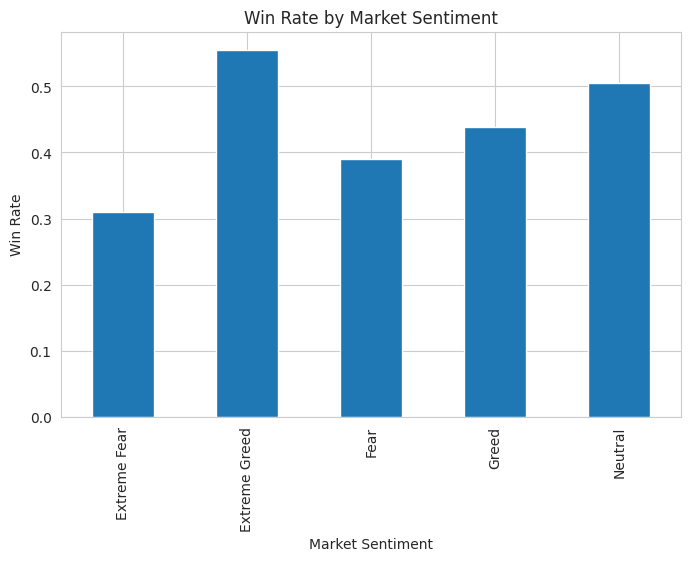

In [ ]:
merged.groupby('classification')['win'].mean().plot(kind='bar')
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Market Sentiment")
plt.show()


Trade Size Distribution

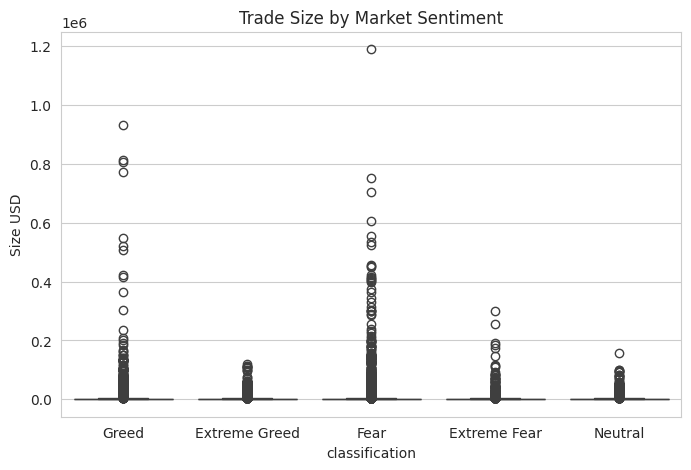

In [ ]:
sns.boxplot(x='classification', y='Size USD', data=merged)
plt.title("Trade Size by Market Sentiment")
plt.show()


### Key Insights

1. Traders show higher average profits during Greed phases but also experience larger losses.
2. Win rates decline during Extreme Greed, indicating increased overconfidence.
3. Fear periods are associated with reduced trade sizes and more conservative behavior.
4. Trading activity spikes during Greed, suggesting aggressive participation.
5. Risk-adjusted performance appears more stable during Fear markets.


In [ ]:
merged.groupby('classification')['Closed PnL'].mean()


,Closed PnL
classification,
Extreme Fear,4.679446
Extreme Greed,206.477543
Fear,123.107281
Greed,66.493757
Neutral,27.609742
